In [21]:
import yaml
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")

from electronfactors.model.utilities import *
from electronfactors.visuals.utilities import create_green_cm

In [22]:
green_cm = create_green_cm()

In [23]:
from matplotlib import rc
rc('font',**{'family':'serif',
             'size':'16'})
rc('text', usetex=True)

In [24]:
def colour(x, alpha=1):
    result = list(green_cm(x))
    result[3] = alpha
    
    return result

In [25]:
def pull_data_edit(energy=12):
    if energy == 12:
        with open("model_cache/12MeV_10app_100ssd.yml", 'r') as file:
            cutout_data = yaml.load(file)

        label = np.array([key for key in cutout_data])
        book_factor = np.array([item[0] == 'P' for i, item in enumerate(label)])

        custom_label = label[~book_factor]

        width = np.array([cutout_data[key]['width'] for key in custom_label])
        length = np.array([cutout_data[key]['length'] for key in custom_label])
        factor = np.array([cutout_data[key]['factor'] for key in custom_label])

        perimeter = np.pi / 2 * (3*(width + length) - np.sqrt((3*width + length)*(3*length + width)))
        area = np.pi / 4 * width * length
        eqPonA = perimeter / area
        
    else:
        width, length, eqPonA, factor = pull_data(energy=energy)
        
    return width, length, eqPonA, factor

In [26]:
def create_histogram(energy):
    
    width, length, eqPonA, factor = pull_data_edit(energy=energy)   
    percent_prediction_differences = calculate_percent_prediction_differences(width, eqPonA, factor)    
    
    plt.figure(figsize=(6 * 1.618, 6))

    bins = np.arange(-1.0, 4/3, 1/3)
    dbins = bins[1] - bins[0]
    binsTrans = bins - dbins/2

    binsTrans = binsTrans.reshape(-1,1)
    binNum = np.argmin(abs(binsTrans - percent_prediction_differences),0)

    representative_height = np.zeros(len(binNum))

    for i in range(len(bins)):
        binRef = (binNum == i)
        representative_height[binRef] = np.arange(sum(binRef)) + 1
    
    print(len(percent_prediction_differences))
    
    plt.hist(
        percent_prediction_differences, bins, 
        fc=colour(0.55, alpha=0.5), lw=2)
    plt.scatter(
        percent_prediction_differences, 
        representative_height, zorder=2, 
        s=200, lw=2, c=colour(0.3, alpha=0.7))
    
    plt.xlabel(
        r'\% Prediction Difference '
        r'$\left[100 \times \frac{\mbox{measured } - \mbox{ predicted}}{\mbox{measured}} \right]$')
    plt.ylabel(r'Frequency')
    plt.title(r'Histogram of percent prediction differences for ' + str(energy) + r' MeV')

40


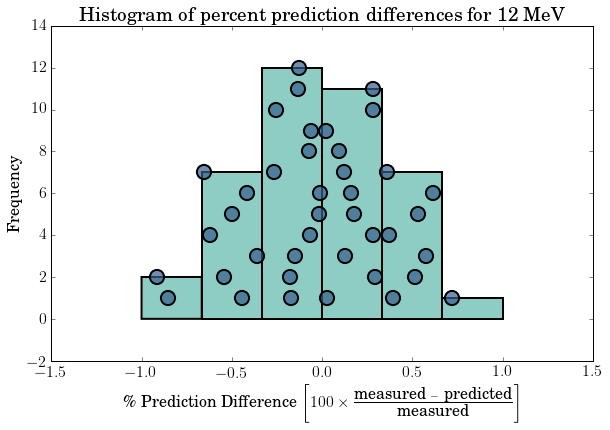

In [29]:
create_histogram(12)
plt.savefig('figures/prediction_difference_histogram.png', bbox_inches='tight', dpi=300)

11
12
7
9


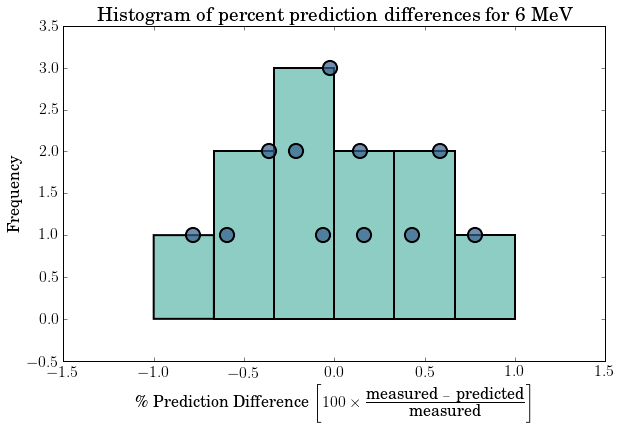

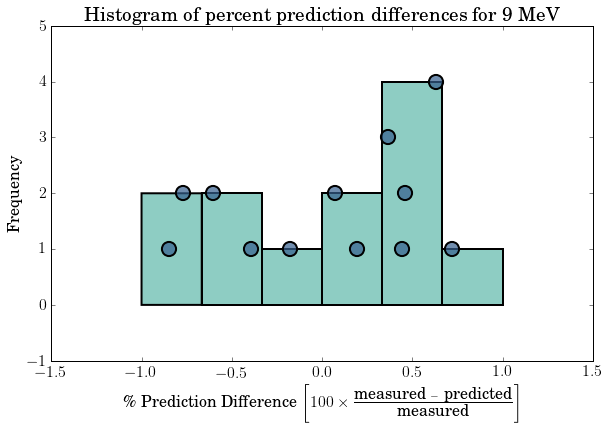

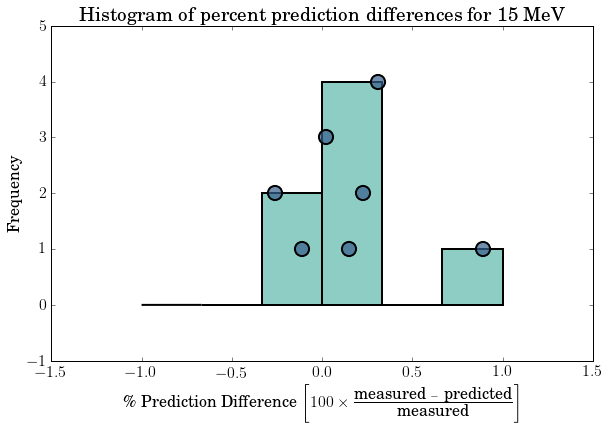

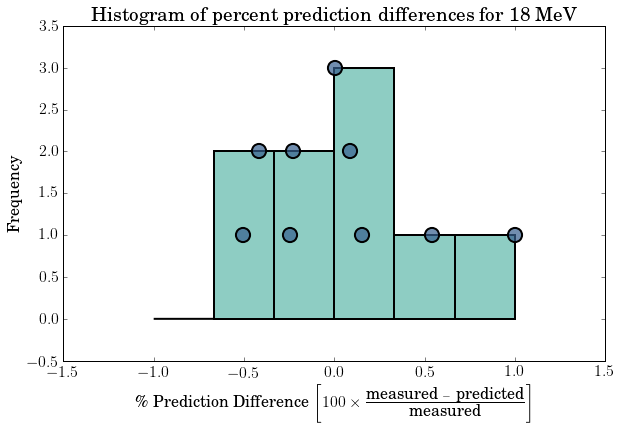

In [28]:
for i in [6, 9, 15, 18]:
    create_histogram(i)